# [튜토리얼] 합성곱신경망(Convolutional Neural Network)을 이용한 플랑크톤 이미지 분류

## 1. 튜토리얼 개요
  - 본 튜토리얼은 이미지 분류에 뛰어난 성능을 보이는 합성곱신경망을 이용하여, **수중에 사는 플랑크톤의 이미지를 분류하는 기능**을 파이썬으로 구현하는 튜토리얼입니다.  

## 2. 활용 데이터
  - 본 튜토리얼을 위해 Kaggle의 [Plankton Challenge](https://www.kaggle.com/c/plankton-challenge/data) 컴피티션에서 사용된 데이터를 이용하였습니다. 훈련 데이터셋을 변경하여 다양한 분야에 응용가능합니다.
  - 실제 데이터에는 121종의 플랑크톤 이미지가 있지만, **본 튜토리얼에서는 4종만을 이용**하였습니다. 

    - train 폴더에는 훈련을 위한 총 4종의 플랑크톤 이미지가 포함되어 있습니다.   
    - test 폴더에는 학습된 모형의 성능평가를 위한 플랑크톤 이미지가 포함되어 있습니다. 
  
## 2. CNN(Convolutional Neural Network)
  - CNN은 Convolutional Neural Networks의 약자로 딥러닝에서 주로 이미지나 영상 데이터 처리에 사용되며, **이미지 분류에서 우수한 성능**을 보입니다.

## 3. Tutoral 주요 내용
  - 합성곱신경망 모형 훈련 및 예측


## Step1. 준비과정
  - 드라이브 마운트, 라이브러리 임포트, 데이터셋 압축해제 등

In [1]:
# 구글 드라이브 연결

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# 라이브러리 임포트

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

import pathlib

In [3]:
# 압축된 입력파일을 지정된 폴더에 압축해제

!unzip '입력파일 경로' -d '압축해제 폴더경로'

Archive:  /gdrive/MyDrive/data/plankton/plankton_sample.zip
   creating: /content/test/
   creating: /content/test/test/
  inflating: /content/test/test/acantharia_protist1.jpg  
  inflating: /content/test/test/acantharia_protist2.jpg  
  inflating: /content/test/test/acantharia_protist3.jpg  
  inflating: /content/test/test/acantharia_protist4.jpg  
  inflating: /content/test/test/acantharia_protist5.jpg  
  inflating: /content/test/test/chaetognath_sagitta1.jpg  
  inflating: /content/test/test/chaetognath_sagitta2.jpg  
  inflating: /content/test/test/chaetognath_sagitta3.jpg  
  inflating: /content/test/test/chaetognath_sagitta4.jpg  
  inflating: /content/test/test/chaetognath_sagitta5.jpg  
  inflating: /content/test/test/copepod_calanoid1.jpg  
  inflating: /content/test/test/copepod_calanoid2.jpg  
  inflating: /content/test/test/copepod_calanoid3.jpg  
  inflating: /content/test/test/copepod_calanoid4.jpg  
  inflating: /content/test/test/copepod_calanoid5.jpg  
  inflating: /

## Step2. 데이터 읽기
  - ImageDataGenerator() 및 flow_from_directory() 함수를 이용하여 처리

In [4]:
# 훈련 데이터셋 읽기

train_path = '/content/train'
img_size = 150
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(img_size,img_size),
                                        color_mode = "grayscale",
                                        batch_size=batch_size,
                                        class_mode='categorical')




Found 2755 images belonging to 4 classes.


In [5]:
# 테스트 데이터셋 읽기

#val_path = '/content/val'

#val_gen = datagen.flow_from_directory(val_path,
#                                      target_size=(img_size,img_size),
#                                      color_mode = "grayscale",
#                                      batch_size=batch_size,
#                                      class_mode='categorical')

test_path = '/content/test'

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(test_path,
                                        target_size=(img_size,img_size),
                                        color_mode = "grayscale",
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 20 images belonging to 1 classes.


## Step 3. CNN 모형 학습
  - 튜토리얼이기 때문에 학습을 위해 10 epochs로 설정하였으며, 성능 향상을 위해 dropout, early stopping 등 다양한 기법 및 CNN기반의 예측모형 적용가능 

In [6]:
# 합성곱 신경망 모형 학습

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

num_of_classes = 4

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size = pool_size)) 

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256, activation = "relu"))
model.add(Dense(num_of_classes, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
history = model.fit(train_gen, batch_size = 32, epochs = 10, verbose = 1)

Epoch 1/10
87/87 [==============================] - 16s 67ms/step - loss: 1.1684 - accuracy: 0.4915
Epoch 2/10
87/87 [==============================] - 6s 64ms/step - loss: 0.5485 - accuracy: 0.7946
Epoch 3/10
87/87 [==============================] - 5s 55ms/step - loss: 0.4630 - accuracy: 0.8211
Epoch 4/10
87/87 [==============================] - 5s 54ms/step - loss: 0.4614 - accuracy: 0.8207
Epoch 5/10
87/87 [==============================] - 5s 54ms/step - loss: 0.3928 - accuracy: 0.8461
Epoch 6/10
87/87 [==============================] - 5s 54ms/step - loss: 0.3765 - accuracy: 0.8534
Epoch 7/10
87/87 [==============================] - 5s 54ms/step - loss: 0.3377 - accuracy: 0.8690
Epoch 8/10
87/87 [==============================] - 5s 54ms/step - loss: 0.3149 - accuracy: 0.8799
Epoch 9/10
87/87 [==============================] - 5s 55ms/step - loss: 0.2843 - accuracy: 0.8962
Epoch 10/10
87/87 [==============================] - 5s 56ms/step - loss: 0.2524 - accuracy: 0.9074


In [9]:
# 학습결과 시각화를 위한 함수

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

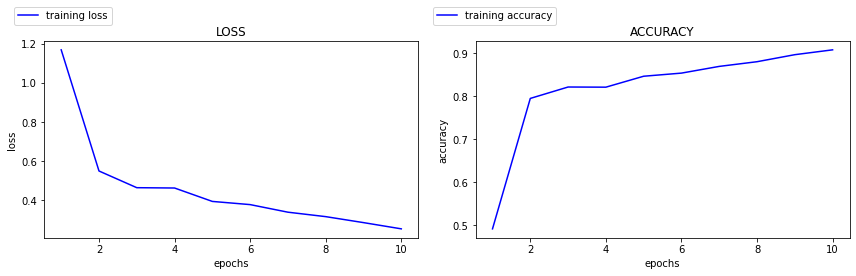

In [10]:
# 학습결과(Loss 및 Accuracy) 시각화

plot_history(history)

In [11]:
# 라벨 맵 확인

label_map = (train_gen.class_indices)
label_map

{'acantharia_protist': 0,
 'chaetognath_sagitta': 1,
 'copepod_calanoid': 2,
 'fecal_pellet': 3}

## Step4. CNN 모형 예측
  - 튜토리얼의 테스트 데이터셋은 20개 이미지이며(4종, 각 종별 5개 이미지) 90%의 분류 정확도 성능을 보임
    - 테스트셋에서 acantharia_protist 및 chaetognath_sagitta는 모두 정확히 분류됨
    - copepod_calanoid의 경우, 14번 인덱스가 잘못 분류되었으며, 
    - 또한, fecal_pellet의 경우, 19번 인덱스가 잘못 분류됨. 

In [17]:
# CNN모형 예측

test1_path = '/content/test'

# Note: shuffle=False causes the test dataset to not be shuffled
test1_gen = datagen.flow_from_directory(test1_path,
                                        target_size=(img_size,img_size),
                                        color_mode = "grayscale",
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 20 images belonging to 1 classes.


In [19]:
pred = model.predict_generator(test1_gen, steps = 20, verbose = 1)

20/20 [==============================] - 0s 4ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [21]:
# 예측결과 확인

df = pd.concat([pd.DataFrame(pred, columns = list(label_map.keys())), pd.DataFrame(test_gen.filenames, columns = ['filename'])], axis=1)
df

,acantharia_protist,chaetognath_sagitta,copepod_calanoid,fecal_pellet,filename
0,9.929857e-01,0.000040,0.006557,4.173015e-04,test/acantharia_protist1.jpg
1,9.532626e-01,0.000173,0.040921,5.643748e-03,test/acantharia_protist2.jpg
2,9.498360e-01,0.000116,0.042353,7.695737e-03,test/acantharia_protist3.jpg
3,8.628911e-01,0.000212,0.007684,1.292129e-01,test/acantharia_protist4.jpg
4,9.320073e-01,0.000088,0.004728,6.317660e-02,test/acantharia_protist5.jpg
5,1.515174e-07,0.993709,0.004194,2.096099e-03,test/chaetognath_sagitta1.jpg
6,2.255515e-08,0.999997,0.000003,7.720384e-08,test/chaetognath_sagitta2.jpg
7,2.316083e-06,0.999930,0.000038,2.984061e-05,test/chaetognath_sagitta3.jpg
8,4.564404e-06,0.999918,0.000068,9.947409e-06,test/chaetognath_sagitta4.jpg
9,4.351436e-05,0.998725,0.000945,2.868187e-04,test/chaetognath_sagitta5.jpg
